
```
Machine Learning Lab 04
A66
MUHAMMAD SHAHNAWAZ KHAN
21070461
```



# Aim : Tensor flow implementation of Regression, K-NN, K-Means for structured data using CSV file



1.   Regression with Tensorflow
2.   K-Means Clustering
3.   K-Nearest Neighbors



## Problem Definition

Download any labeled and
unlabeled dataset and implement
the tenseflow version of standard
regression, kmeans, and k-NN
algorithms to understand the
workings of tf. Also compare the
implementation with reference to
code written in previous plractical
without use of TensorFlow



# Executions :
##0. Library Importing, Feature Extraction, Train-Test Split, Scaling

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# CSV Importing
data = pd.read_csv('winequality-red.csv', sep=',')
data.head()

# Feature Extraction
X = data.drop('quality', axis=1)
y = data['quality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scali ng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##1. Regression

1.  Initialize weights (coefficients) and bias to small random values.
2.  Compute predictions by multiplying input features with weights, adding bias, and applying the linear activation function.
3.  Measure the difference between predictions and actual target values using a loss function (e.g., Mean Squared Error).
4.  Adjust weights and bias iteratively using gradient descent to minimize the loss, moving towards the optimal parameter values.
5.  Repeat steps 2-4 until the model converges, or a predefined number of iterations is reached.
6.  Use the trained model to make predictions on new, unseen data by applying the learned weights and bias.

Epoch 1/100
40/40 - 2s - loss: 34.5892 - val_loss: 34.0921 - 2s/epoch - 39ms/step
Epoch 2/100
40/40 - 0s - loss: 33.8416 - val_loss: 33.4067 - 348ms/epoch - 9ms/step
Epoch 3/100
40/40 - 0s - loss: 33.1390 - val_loss: 32.7565 - 301ms/epoch - 8ms/step
Epoch 4/100
40/40 - 0s - loss: 32.4801 - val_loss: 32.1384 - 367ms/epoch - 9ms/step
Epoch 5/100
40/40 - 0s - loss: 31.8454 - val_loss: 31.5679 - 346ms/epoch - 9ms/step
Epoch 6/100
40/40 - 0s - loss: 31.2482 - val_loss: 31.0192 - 153ms/epoch - 4ms/step
Epoch 7/100
40/40 - 0s - loss: 30.6765 - val_loss: 30.4876 - 419ms/epoch - 10ms/step
Epoch 8/100
40/40 - 0s - loss: 30.1252 - val_loss: 29.9759 - 318ms/epoch - 8ms/step
Epoch 9/100
40/40 - 0s - loss: 29.5968 - val_loss: 29.4751 - 349ms/epoch - 9ms/step
Epoch 10/100
40/40 - 0s - loss: 29.0787 - val_loss: 29.0008 - 277ms/epoch - 7ms/step
Epoch 11/100
40/40 - 0s - loss: 28.5999 - val_loss: 28.5336 - 242ms/epoch - 6ms/step
Epoch 12/100
40/40 - 0s - loss: 28.1051 - val_loss: 28.0726 - 283ms/epoch -

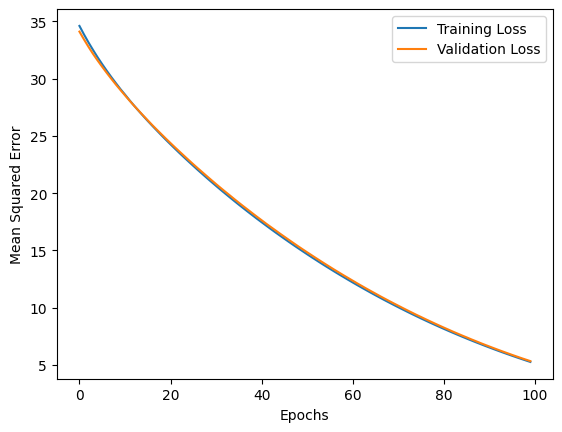

In [ ]:
# Importing MSE and R2 for Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Model Creation
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)])

# Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Training and Testing the Model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Data Visualization
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()



##2. K-Means Algorithm

1.   Randomly select kk data points as initial cluster centroids.
2.   Assign each data point to the cluster whose centroid is closest (usually based on Euclidean distance).
3. Recalculate the centroids as the mean of all data points assigned to each cluster.
4. Iterate between steps 2 and 3 until convergence (when centroids no longer change significantly) or a specified number of iterations.
5. Each data point belongs to the cluster associated with the nearest centroid after convergence

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index: 0.029215295725839783
Normalized Mutual Information: 0.05499680582108919
Accuracy for K-Means: 0.00%


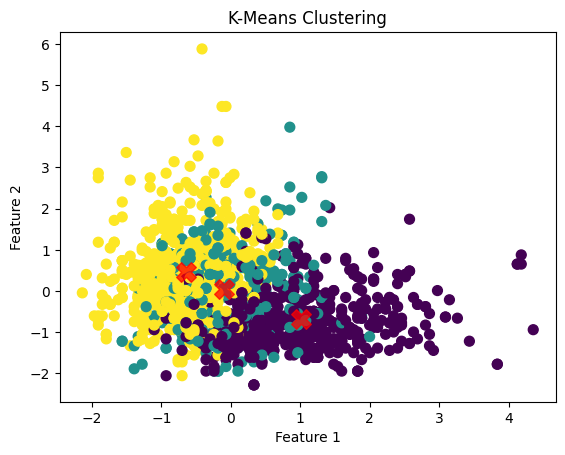

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Scaling the Data
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict the clusters for the test set
y_kmeans = kmeans.predict(X_scaled)

# Evaluate K-Means using adjusted rand index and normalized mutual information
ari = adjusted_rand_score(y, y_kmeans)
nmi = normalized_mutual_info_score(y, y_kmeans)
accuracy_kmeans = np.mean(y_kmeans == y) * 100

print(f'Adjusted Rand Index: {ari}')
print(f'Normalized Mutual Information: {nmi}')
print(f'Accuracy for K-Means: {accuracy_kmeans:.2f}%')

# Visualize the K-Means clusters (considering only the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


##3. K-Nearest Neighbior Algorithm

  1. Choose the number of neighbors (kk) to consider for classification.
  2. Measure the distance between the new instance and all instances in the training set (using a distance metric like Euclidean).
  3. Select the kk instances with the shortest distances to the new instance.
  4. Assign the class label by majority voting among the kk neighbors.
  5. Classify the new instance based on the determined class label.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Model Predictions
y_knn_pred = knn.predict(X_test_scaled)

# Model Evaluation
accuracy_knn = accuracy_score(y_test, y_knn_pred)*100
conf_matrix = confusion_matrix(y_test, y_knn_pred)

print(f'Accuracy for KNN: {accuracy_knn:.2f}%')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy for KNN: 54.69
Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 0  2 88 40  0  0]
 [ 1  0 49 72 10  0]
 [ 0  0  7 20 15  0]
 [ 0  0  1  1  3  0]]


#Result Analysis :

###Regression :
Mean Squared Error: 5.34    
R^2 Score: -7.18603248894552

###K-Means :
Adjusted Rand Index: 0.029  
Normalized Mutual Information: 0.054
Accuracy for K-Means: 0.00%

###KNN :
Accuracy for KNN: 54.69%

***Hence we have realized three points from our analysis :***

1. There is not much connection between the objective aspects of a wine and its quality in terms of 'taste', a very subjective attribute
2. That K-NN has worked the best to map out a poissible conncection between the data and the expected output
3. Machine Learning becomes a lot more easier and concise with help of TensorFlow with help of the built in functions.

# Conclusion :

Hence we were able to effectively study and implement machine learning algorithms such as Regression, KMeans and K-Nearest Neighbor by use of TensorFlow